# MDS miscalleneous

In [1]:
import timeit
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import pydiodon as dio

loading pydiodon - version 23.01.28


In [ ]:
Dis, rn, cn = dio.load_dataset("guiana_trees")

## Analysis with Nyström method

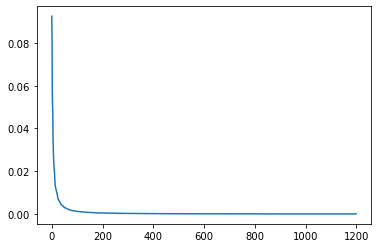

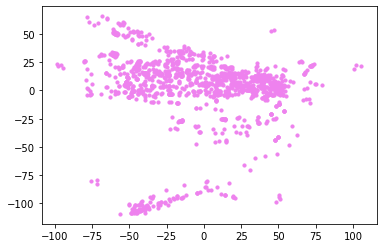

In [10]:
m = 1200
n = Dis.shape[0]
ind = range(m)
ind_al = range(m+1,n)
Gram = dio.dis2gram(Dis)
G_11 = Gram[np.ix_(ind,ind)]
G_12 = Gram[np.ix_(ind,ind_al)]
G_21 = G_12.T
U_11, S_11, VT_11	= np.linalg.svd(G_11, full_matrices=False)
plt.plot(S_11/np.sum(S_11))
plt.show()
X_1 = U_11 @ np.diag(np.sqrt(S_11))
X_2 = U_11 @ np.diag(1/np.sqrt(S_11))
X_2 = G_21 @ X_2
X = np.concatenate((X_1,X_2), axis = 0)
F1 = X[:,0]
F2 = X[:,1]
plt.scatter(F1,F2,c="violet", s=10)
plt.show()



## Analysis of random matrices

### Building the distance matrix

In [11]:
n = 2000
p = 1000
A = np.random.random((n,p))
dis = ssd.pdist(A)
Dis = ssd.squareform(dis)
print(Dis.shape)

(2000, 2000)


### Running the MDS with svd

In [12]:
print("\nmds with numpy, method svd")
t_start   = timeit.default_timer()
Xrs, Srs	= dio.mds(Dis)
t_stop   = timeit.default_timer()
print("\nDuration with numpy, SVD is", t_stop-t_start)


mds with numpy, method svd
1091 positive eigenvalues

Duration with numpy, SVD is 2.0284846820031817


#### Parallel coordinates for a random distance matrix

[pydiodon]:[plot_components_splines()]


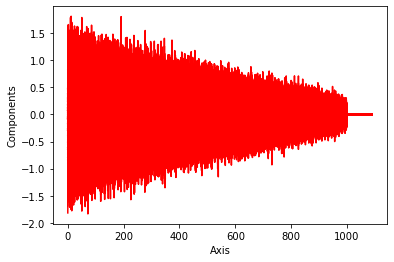

In [13]:
dio.plot_components_splines(Xrs)

### Running MDS with rSVD

In [14]:
print("\nmds with numpy, method grp")
t_start   = timeit.default_timer()
Xrg, Srg	= dio.mds(Dis, k=800, meth="grp")
t_stop   = timeit.default_timer()
print("\nDuration with numpy, rSVD is", t_stop-t_start)


mds with numpy, method grp

Duration with numpy, rSVD is 0.45461376599996584


### Comparison of the results (first eigenvalues)

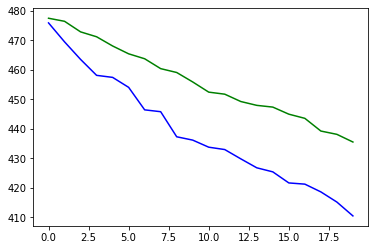

In [15]:
k = 20
plt.plot(Srs[0:k], c="green")
plt.plot(Srg[0:k], c="blue")
plt.show()